In [1]:
#read relevant data from the file
import pandas as pd
import numpy as np
second_df = pd.read_csv('datasets/Normalized_Dataset_edu-prisectet2.csv')

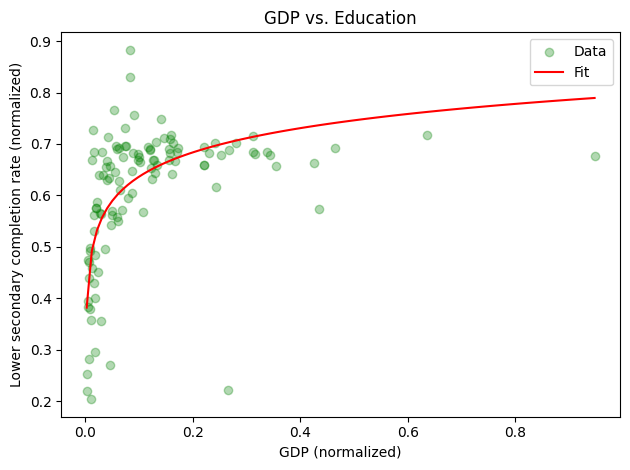

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
from scipy.stats import zscore
import matplotlib.pyplot as plt

def log_func(x, a, b):
    return a * np.log(x) + b


# Calculate the z-scores of the data
second_df['z_score_GDP'] = zscore(second_df['GDP'])
second_df['z_score_Value'] = zscore(second_df['Value'])

# Define a threshold to identify outliers
threshold = 6

# Filter the data to remove outliers
filtered_df = second_df[(np.abs(second_df['z_score_GDP']) < threshold) & (np.abs(second_df['z_score_Value']) < threshold)]

# Extract cleaned data for fitting
x_cleaned = filtered_df["GDP"].values
y_cleaned = filtered_df["Value"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_cleaned, y_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_cleaned), max(x_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=filtered_df["GDP"], y=filtered_df["Value"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Completion rate (normalized)'))


# Optionally, you can use matplotlib to show the fit
plt.scatter(filtered_df['GDP'], filtered_df['Value'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Lower secondary completion rate (normalized)')
plt.title('GDP vs. Education')
plt.legend()
plt.tight_layout()
plt.show()